# **Linear Regression**

In [54]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv", index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [55]:
df.replace({"district": {"Юнусабадский": "Yunusobod", "Чиланзарский": "Chilonzor", "Мирзо-Улугбекский": "Mirzo-Ulugbek",
                         "Мирабадский": "Mirabad", "Яккасарайский": "Yakasaroy", "Яшнободский": "Yashnabod",
                         "Шайхантахурский": "Shayxontohur", "Олмазорский": "Olmazor", "Сергелийский": "Sergeli",
                         "Янгихаётский": "Yangihayot", "Учтепинский": "Uchtepa", "Бектемирский": "Bektemir"}}, inplace=True)


In [56]:
df['district'].value_counts()

Chilonzor        1616
Mirzo-Ulugbek    1342
Uchtepa           872
Yunusobod         847
Mirabad           717
Yakasaroy         628
Yashnabod         456
Shayxontohur      356
Olmazor           262
Sergeli           159
Yangihayot         15
Bektemir            8
Name: district, dtype: int64

In [57]:
housing = df[df.district=='Chilonzor']
housing.head()

,district,rooms,size,level,max_levels,price
2,Chilonzor,2,42.0,4,4,37000.0
3,Chilonzor,3,65.0,1,4,49500.0
4,Chilonzor,3,70.0,3,5,55000.0
5,Chilonzor,1,28.0,1,4,25500.0
6,Chilonzor,1,30.0,2,4,21200.0


In [68]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [69]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

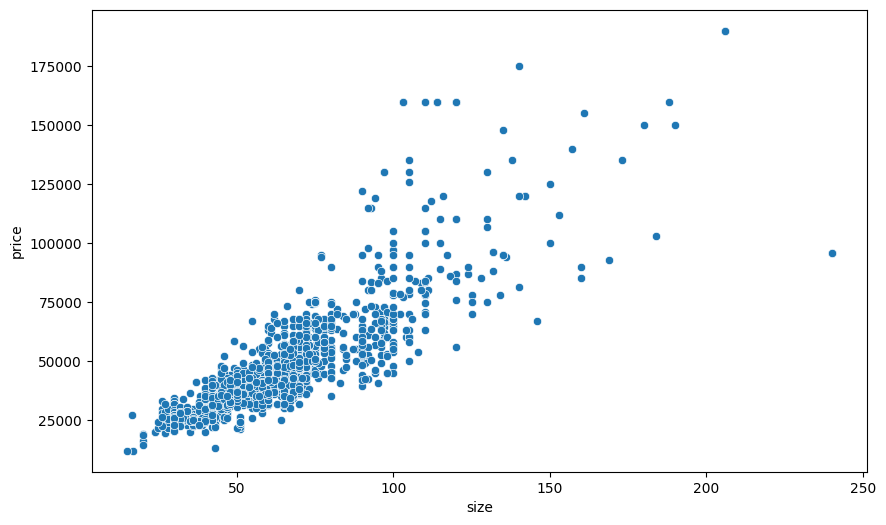

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

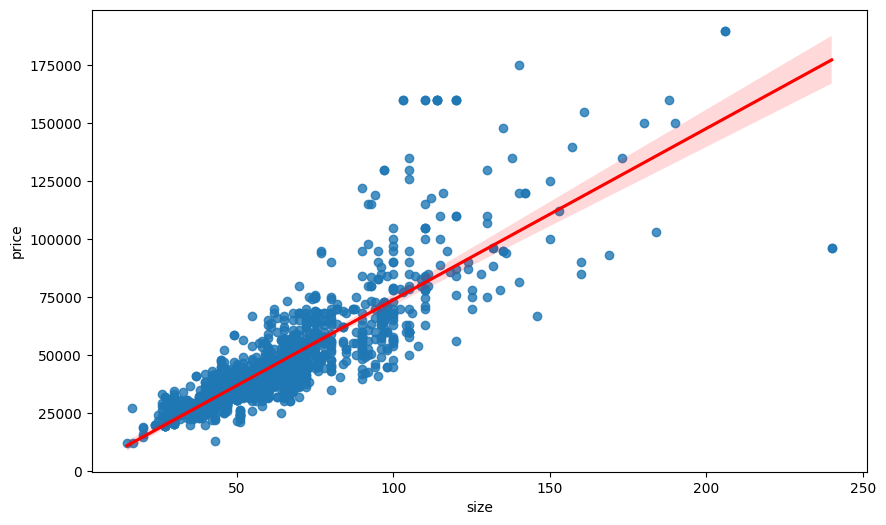

In [73]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

# **1-Vazifa**

Sizning vazifangiz yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan xolda θ0 va θ1 koeffisientlarni hisoblash.

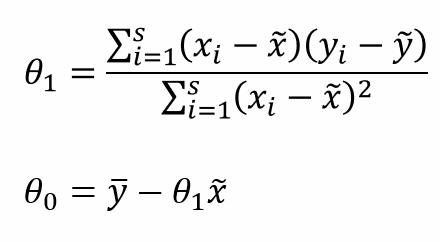

Bu yerda
�
~
x
~
  - X ustun uchun o'rtracha qiymat,
�
~
y
~
​
  - y ustun uchun o'rtracha qiymat

In [74]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [77]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=740.0264822713287


In [80]:
theta0 = ymean-theta1*Xmean
print(f"{theta0=}")

theta0=-195.94911352690542


# **2-Vazifa**
X dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi y ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

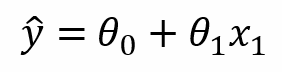

In [81]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [82]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


# **3-Vazifa**
Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

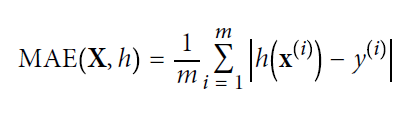

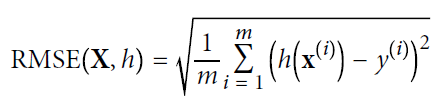

In [84]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4140.35031634715


In [85]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173715


# **Scikit-learn yordamida LR**

Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.

Avvalo ma'lumotlarni train va testga bo'lib olamiz.

In [86]:
housing.shape

(1616, 6)

Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

In [87]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

# Linear Regression ML

In [88]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=732.7784051414766
theta0=106.31843170110369


theta0 va theta1 qiymatlari yordamida to'g'ri chiziq chizamiz

Text(0, 0.5, 'Price')

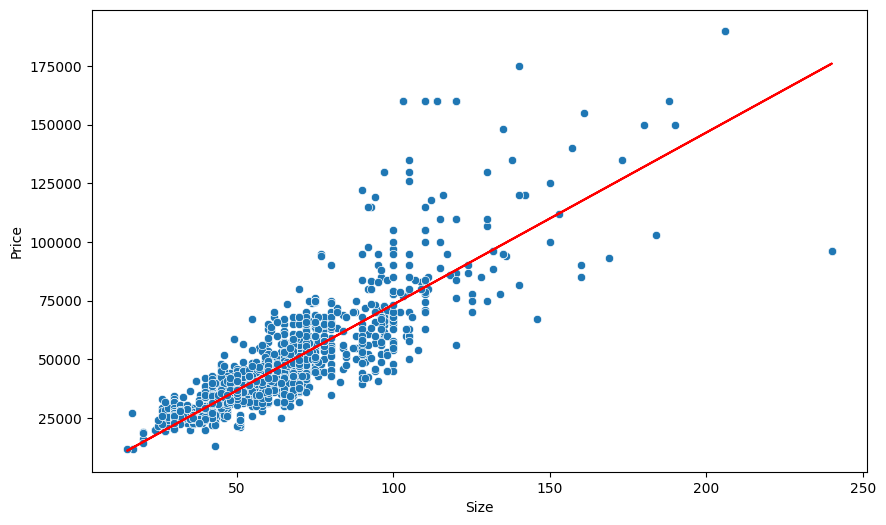

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

## Modelni baholaymiz

In [90]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [91]:
y_predict = LR_model.predict(x_test)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=12734.803748258666
